In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('kc_house_data_train.csv')

In [4]:
df.head(2)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283


In [5]:
df.isna().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [8]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
#DROP UNAMED COLUMN
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

***DATE COLUMN***

In [10]:
#CHANGE DATE TO DATETIME
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283


In [12]:
df.corr()
#off hand ones with price >6 are sqft_living, grade, sqft_above (bathrroms & sqft_living15 have 5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605
price,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665
bathrooms,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185
condition,-0.014272,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125


In [13]:
#ADD YEAR COLUMN
df['year'] = pd.DatetimeIndex(df['date']).year

In [14]:
#ADD MONTH COLUMN
df['month'] = pd.DatetimeIndex(df['date']).month

In [15]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,10
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,8


***PRICE***

In [16]:
df['price'].sort_values(ascending = False)

10366    7700000.0
6903     7062500.0
7519     6885000.0
2232     5570000.0
1979     5350000.0
           ...    
1269       82500.0
15956      82000.0
9193       80000.0
4869       78000.0
9060       75000.0
Name: price, Length: 17290, dtype: float64

In [17]:
df['price'].describe()

count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


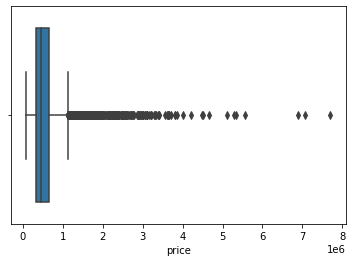

In [18]:
price_boxplot = sns.boxplot(df['price'])

In [19]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,10
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,8


***Bedrooms***

In [20]:
df['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [21]:
#noticed bedroom with 33 - explored further
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
8597,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014,6


In [22]:
#after further anazlying 33 bedroom, noted only 1.75 baths, sqft_living and sqft_loabst
#smaller size when compared to others so believe is typo
df[df['bedrooms'] == 3]['sqft_lot'].sort_values()

3407        572
6455        651
13243       683
3044        700
579         704
          ...  
16978    478288
3262     507038
30       542322
431      623779
2705     843309
Name: sqft_lot, Length: 7864, dtype: int64

In [23]:
#REPLACE 33 WITH 3 AFTER ANALYZIN 33 
df['bedrooms'].replace(to_replace = 33, value = 3, inplace = True)

In [24]:
df['bedrooms'].value_counts()

3     7865
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
Name: bedrooms, dtype: int64

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


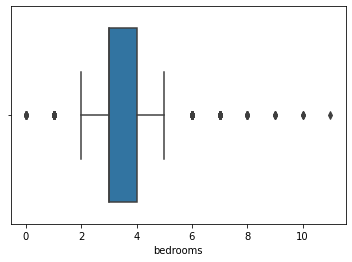

In [25]:
bedrooms_boxplot = sns.boxplot(df['bedrooms'])

***Bathrooms***

In [26]:
df['bathrooms'].value_counts().sort_index()

0.00       8
0.50       3
0.75      52
1.00    3100
1.25       6
1.50    1168
1.75    2431
2.00    1549
2.25    1666
2.50    4322
2.75     896
3.00     592
3.25     455
3.50     591
3.75     135
4.00     107
4.25      64
4.50      76
4.75      16
5.00      17
5.25      11
5.50       7
5.75       3
6.00       6
6.25       2
6.50       1
6.75       2
7.50       1
7.75       1
8.00       2
Name: bathrooms, dtype: int64

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


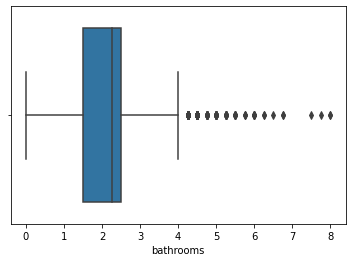

In [27]:
bathrooms_boxplot = sns.boxplot(df['bathrooms'])

***sqft_living***

In [28]:
df['sqft_living'].describe()

count    17290.000000
mean      2081.464604
std        920.018539
min        290.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


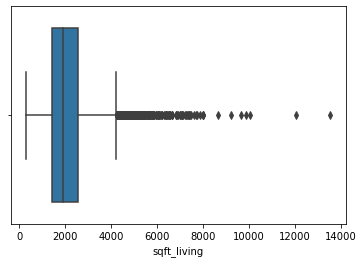

In [29]:
sqft_living_boxplot = sns.boxplot(df['sqft_living'])

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,10
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,8
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,8
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,3
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,7


In [31]:
df['yr_renovated'].value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [32]:
#basement has value 0 might need to change
#yr_renovated has value 0 might need to change - possible created a recently renovated column

In [33]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,10
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,8


In [34]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [35]:
ols(formula= formula, data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:50:56   Log-Likelihood:            -2.3574e+05
No. Observations:               17290   AIC:                         4.723e+05
Df Residuals:                   16901   BIC:                         4.753e+05
Df Model:                         388                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -2852.9733   2303.912     -1.238      0.216   -7368.882    1662.935
date[T.Timestamp('2014-05-03 00:00:00')]  2.055e+05   1.21e+05      1.694      0.090   -3.23e+04    4.43e+05
date[T.Timestamp('2014-05-04 00:00:00')] -7.084e+04   1.06e+05     -0.669      0.504   -2.79e+05    1.37e+05
date[T.Timestamp('2014-05-05 00:00:00')] -9897.7836   3.87e+04     -0.256      0.798   -8.58e+04     6.6e+04
date[T.Timestamp('2014-05-06 00:00:00')] -1.183e+04   3.73e+04     -0.317      0.751   -8.49e+04    6.13e+04
date[T.Timestamp('2014-05-07 00:00:00')]  1.702e+04   3.76e+04      0.452      0.651   -5.67e+04    9.08e+04
date[T.Timestamp('2014-05-08 00:00:00')]  3.973e+04   3.78e+04      1.052      0.293   -3.43e+04    1.14e+05
date[T.Timestamp('2014-05-09 00:00:00')]  -4.01e+04   3.87e+04     -1.036      0.300   -1.16e+05    3.58e+04
date[T.Timestamp('2014-05-10 00:00:00')]  2502.8953   1.21e+05      0.021      0.984   -2.35e+05     2.4e+05
date[T.Timestamp('2014-05-11 00:00:00')]  6.216e+04   1.47e+05      0.422      0.673   -2.26e+05    3.51e+05
date[T.Timestamp('2014-05-12 00:00:00')]    1.9e+04   3.76e+04      0.505      0.614   -5.48e+04    9.28e+04
date[T.Timestamp('2014-05-13 00:00:00')]  3.389e+04   3.78e+04      0.898      0.369   -4.01e+04    1.08e+05
date[T.Timestamp('2014-05-14 00:00:00')]  -1.21e+04   3.79e+04     -0.320      0.749   -8.63e+04    6.21e+04
date[T.Timestamp('2014-05-15 00:00:00')]  1.669e+04   3.79e+04      0.441      0.659   -5.76e+04    9.09e+04
date[T.Timestamp('2014-05-16 00:00:00')] -2789.0488   3.84e+04     -0.073      0.942   -7.81e+04    7.25e+04
date[T.Timestamp('2014-05-17 00:00:00')]  7.314e+04   2.06e+05      0.355      0.723   -3.31e+05    4.77e+05
date[T.Timestamp('2014-05-18 00:00:00')] -1.997e+04   9.56e+04     -0.209      0.835   -2.07e+05    1.67e+05
date[T.Timestamp('2014-05-19 00:00:00')]  3989.2306   3.72e+04      0.107      0.915   -6.89e+04    7.69e+04
date[T.Timestamp('2014-05-20 00:00:00')]  2.008e+04   3.54e+04      0.568      0.570   -4.93e+04    8.94e+04
date[T.Timestamp('2014-05-21 00:00:00')]  1.422e+04   3.63e+04      0.392      0.695   -5.69e+04    8.54e+04
date[T.Timestamp('2014-05-22 00:00:00')]   2.07e+04   3.72e+04      0.557      0.578   -5.22e+04    9.36e+04
date[T.Timestamp('2014-05-23 00:00:00')] -1.365e+04   3.75e+04     -0.364      0.716   -8.72e+04    5.99e+04
date[T.Timestamp('2014-05-24 00:00:00')]   5.06e+04   7.06e+04      0.717      0.473   -8.77e+04    1.89e+05
date[T.Timestamp('2014-05-25 00:00:00')] -1.538e+05   1.06e+05     -1.451      0.147   -3.61e+05     5.4e+04
date[T.Timestamp('2014-05-26 00:00:00')] -2.079e+04   7.76e+04     -0.268      0.789   -1.73e+05    1.31e+05
date[T.Timestamp('2014-05-27 00

***CATEGORIES***

In [36]:
#floors, waterfront, view, condition, grade, zipcode

**FLOORS**

In [37]:
df['floors'].value_counts()

1.0    8606
2.0    6538
1.5    1524
3.0     475
2.5     140
3.5       7
Name: floors, dtype: int64

In [38]:
one_floor = df[df['floors'] < 2]['price']
two_floor = df[df['floors'] < 3]['price']
three_floor = df[df['floors'] <4]['price']
more_three_floor = df[df['floors'] > 3]['price']

#ANOVA TEST
f = stats.f_oneway(one_floor,
                  two_floor,
                  three_floor,
                  more_three_floor)
f

F_onewayResult(statistic=138.51778138358648, pvalue=2.4846257471142813e-89)

**WATERFRONT**

In [39]:
df['waterfront'].value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

In [40]:
water_0 = df[df['waterfront'] == 0]['price']
water_1 = df[df['waterfront'] == 1]['price']

print(water_0.mean())
print(water_1.mean())
stats.ttest_ind(water_0, water_1, equal_var=True)

531505.1133395522
1688486.1739130435


Ttest_indResult(statistic=-37.72330429549608, pvalue=2.465038317654299e-299)

In [41]:
#difference in price with waterfront vs none

**VIEW**

In [42]:
df['view'].value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [43]:
view_0 = df[df['view'] == 0]['price']
view_1 = df[df['view'] == 1]['price']
view_2 = df[df['view'] == 2]['price']
view_3 = df[df['view'] == 3]['price']
view_4 = df[df['view'] == 4]['price']

print(view_0.mean())
print(view_1.mean())
print(view_2.mean())
print(view_3.mean())
print(view_4.mean())
f = stats.f_oneway(view_0,
                  view_1,
                  view_2,
                  view_3,
                  view_4)
f

496770.421231777
813770.178030303
779421.2193548387
964004.756097561
1481651.2777777778


F_onewayResult(statistic=876.7689357683041, pvalue=0.0)

In [44]:
less_view = df[df['view'] <= 3]['price']
more_view = df[df['view'] > 3]['price']

stats.ttest_ind(no_reno, reno, equal_var=True)

NameError: name 'no_reno' is not defined

In [ ]:
#ANOVA: all prices not equal with view
#t-test: difference if view 1,2,3 or 4,5

**Condition**

In [ ]:
condition_1_2 = df[df['condition'] <= 2]['price']
condition_3 = df[df['condition'] == 3]['price']
condition_4_5 = df[df['condition'] >= 4]['price']

print(condition_1_2.mean())
print(condition_3.mean())
print(condition_4_5.mean())

f = stats.f_oneway(condition_1_2,
                  condition_3,
                  condition_4_5,)
f

In [ ]:
stats.ttest_ind(condition_3, condition_4_5, equal_var=True)

In [ ]:
condition_less_3 = df[df['condition'] < 3]['price']
condition_3_plus = df[df['condition'] >= 3]['price']
stats.ttest_ind(condition_less_3, condition_3_plus, equal_var=True)

In [ ]:
#ANOVA: conditions grouped less 3, 3, more 3 not equal
#t-test: condition 3 and condition 4,5 are equal
#t-test: condition 1,2 and 3,4,5 are not equal

**GRADE**

In [ ]:
df['grade'].value_counts()

***Stats - Test***

In [ ]:
no_reno = df[df['yr_renovated'] == 0]['price']
reno = df[df['yr_renovated'] != 0]['price']

In [ ]:
stats.ttest_ind(no_reno, reno, equal_var=True)

In [ ]:
spring = df[(df['month'] >= 3) & (df['month'] <= 6)]['price']
not_spring = df[((df['month'] >= 1) & (df['month']< 3)) | (df['month'] > 6)]['price']

In [ ]:
stats.ttest_ind(spring, not_spring, equal_var=True)

**PLAYING WITH DUMMIES**

In [ ]:
#floors, waterfront, view, condition, grade, zipcode

In [ ]:
floors_dummies = pd.get_dummies(df['floors'], prefix='flr', drop_first=True)
waterfront_dummies = pd.get_dummies(df['waterfront'], prefix='water', drop_first=True)
view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True)
condition_dummies = pd.get_dummies(df['condition'], prefix='condition', drop_first=True)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)
price = df['price']

In [ ]:
ols_df = pd.concat([df, floors_dummies, waterfront_dummies, view_dummies, condition_dummies,
                   grade_dummies, zipcode_dummies], axis=1)

In [ ]:
outcome = 'price'
predictors = ols_df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [ ]:
ols_df.rename(columns={"flr_1.5": "flr_1_5", "flr_2.0": "flr_2", "flr_2.5": "flr_2_5", "flr_3.0": "flr_3", "flr_3.5": "flr_3_5"}, inplace = True)

In [ ]:
ols_df

In [ ]:
model = ols(formula=formula, data=ols_df).fit()
model.summary()

In [ ]:
df['yr_built'].value_counts()

In [ ]:
df[‘yard’] = df.sqft_lot - (df.sqft_living/df.floors )